In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_stata('pwt91.dta').set_index(['countrycode','year'])
df['gdppc'] = df['rgdpe']/df['pop']
df['prod'] = df['rgdpe']/(df['emp']*df['avh'])

df.head()

country   currency_unit  rgdpe  rgdpo  pop  emp  avh  hc  \
countrycode year                                                            
ABW         1950   Aruba  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   
            1951   Aruba  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   
            1952   Aruba  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   
            1953   Aruba  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   
            1954   Aruba  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   

                  ccon  cda  ...  csh_r  pl_c  pl_i  pl_g  pl_x  pl_m  pl_n  \
countrycode year             ...                                              
ABW         1950   NaN  NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
            1951   NaN  NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
            1952   NaN  NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
            1953   NaN  NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
            1954   NaN  NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                  pl_k  gdppc  prod  
countrycode year                     
ABW         1950   NaN    NaN   NaN  
            1951   NaN    NaN   NaN  
            1952   NaN    NaN   NaN  
            1953   NaN    NaN   NaN  
            1954   NaN    NaN   NaN  

[5 rows x 52 columns]

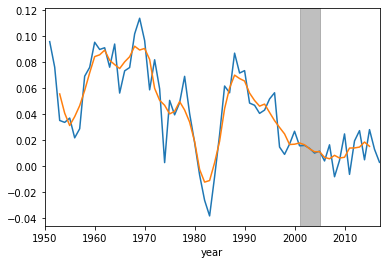

In [8]:
np.log(df.loc['JPN','prod']).diff().plot()
np.log(df.loc['JPN','prod']).diff().rolling(5,center=True).mean().plot()
plt.axvspan(2001,2005,color='grey',alpha=0.5)

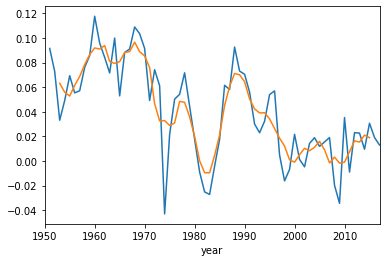

In [7]:
np.log(df.loc['JPN','gdppc']).diff().plot()
np.log(df.loc['JPN','gdppc']).diff().rolling(5,center=True).mean().plot()

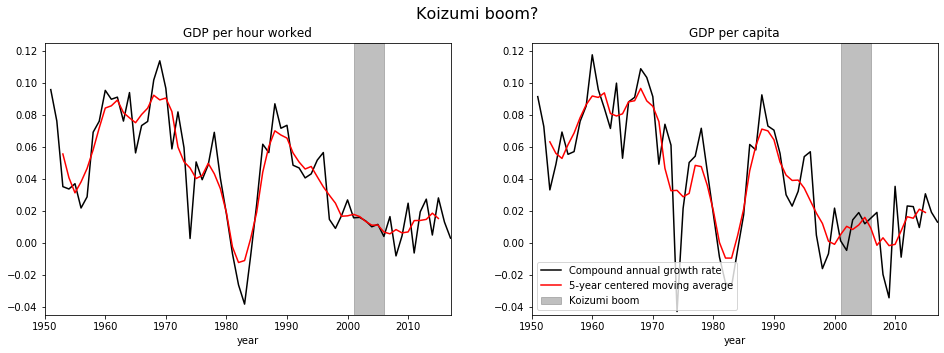

In [44]:
fig, ax = plt.subplots(1,2,sharey=False,figsize=(16,5))
np.log(df.loc['JPN','prod']).diff().plot(ax=ax[0],color='k')
np.log(df.loc['JPN','prod']).diff().rolling(5,center=True).mean().plot(ax=ax[0],color='r')
ax[0].axvspan(2001,2006,color='grey',alpha=0.5)
ax[0].set_title('GDP per hour worked')
ax[0].axis([1950,2017,-0.045,0.125])

np.log(df.loc['JPN','gdppc']).diff().plot(ax=ax[1],color='k')
np.log(df.loc['JPN','gdppc']).diff().rolling(5,center=True).mean().plot(ax=ax[1],color='r')
ax[1].axvspan(2001,2006,color='grey',alpha=0.5)
ax[1].set_title('GDP per capita')
ax[1].legend(['Compound annual growth rate','5-year centered moving average','Koizumi boom'],loc='lower left')
ax[1].axis([1950,2017,-0.045,0.125])
plt.suptitle('Koizumi boom?',fontsize=16)
plt.savefig('koizumi_boom.png',dpi=300)

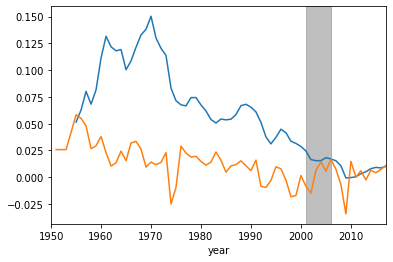

In [50]:
np.log(df.loc['JPN','rkna']).diff().plot()
np.log(df.loc['JPN','emp']*df.loc['JPN','avh']*df.loc['JPN','hc']).diff().plot()
plt.axvspan(2001,2006,color='grey',alpha=0.5)

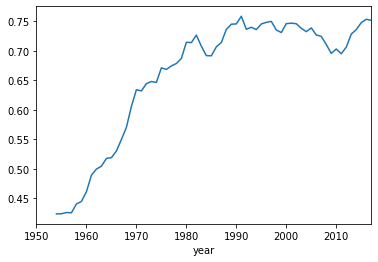

In [11]:
df.loc['JPN','ctfp'].plot()